### 1.	Develop a shell script to automate the setup of a web server, including installing necessary packages and configuring the server.

1. First create an empty file with `.sh` extension, by writing `nano ques1.sh`.
2. Enter the commands:<br>
`sudo apt-get update`<br>
`sudo apt-get install -y apache2`<br>
`sudo systemctl enable apache2`<br>
`sudo systemctl start apache2`<br>
`sudo systemctl status apache2`

4. Save by `CTRL + X`, then press `Y` and then `Enter`
5. Provide excecuting permission by `chmod +x ques1.sh`
6. Run the file by typing ` ./ques1.sh`

### 2.	Write a shell script to perform a system health check, including checking CPU usage, memory usage, and disk space, and generate a report.

1. First create an empty file with `.sh` extension, by writing `nano ques2.sh`.
2. Enter the commands:<br>

`cpu_usage=$(top -bn1 | grep "Cpu(s)" | \`<br>
`           sed "s/.*, *\([0-9.]*\)%* id.*/\1/" | \`<br>
`           awk '{print 100 - $1"%"}')`<br>

`mem_usage=$(free -m | awk 'NR==2{printf "Memory Usage: %s/%sMB (%.2f%%)\n", $3, $2, $3*100/$2 }')`<br>

`disk_usage=$(df -h | awk '$NF=="/"{printf "Disk Usage: %d/%dGB (%s)\n", $3, $2, $5}')`<br>

`echo "CPU Usage: $cpu_usage"`<br>
`echo "$mem_usage"`<br>
`echo "$disk_usage"`<br>

4. Save by `CTRL + X`, then press `Y` and then `Enter`
5. Provide excecuting permission by `chmod +x ques2.sh`
6. Run the file by typing `./ques2.sh`

### 3.	Create a shell script to manage user permissions and automate the backup of critical files.

1. First create an empty file with `.sh` extension, by writing `nano ques3.sh`.
2. Enter the commands:<br>

`user="sarim"`<br>
`critical_files="/home/sarim/week11/*"`<br>
`backup_dir="/home/sarim/week12/backup"`<br>

`usermod -aG sudo $user`<br>

`mkdir -p $backup_dir`<br>
`cp -r $critical_files $backup_dir`<br>

`echo "User permissions updated and critical files backed up."`<br>

4. Save by `CTRL + X`, then press `Y` and then `Enter`
5. Provide excecuting permission by `chmod +x ques3.sh`
6. Run the file by typing `sudo ./ques3.sh`

### 4.	Write a comprehensive shell script to manage and rotate system logs, ensuring old logs are archived and deleted after a certain period.

1. First create an empty file with `.sh` extension, by writing `nano ques4.sh`.
2. Enter the commands:<br>

`log_dir="/home/sarim/week12/log"`<br>
`archive_dir="/home/sarim/week12/log/archive"`<br>

`mkdir -p $archive_dir`<br>

`find $log_dir -type f -name "*.log" -mtime +30 -exec mv {} $archive_dir \;`<br>

`find $archive_dir -type f -name "*.log" -mtime +365 -delete`<br>

`echo "System logs managed and rotated."`<br>

4. Save by `CTRL + X`, then press `Y` and then `Enter`
5. Provide excecuting permission by `chmod +x ques4.sh`
6. Run the file by typing `./ques4.sh`

### 5.	You have been given a dataset temp.csv having independent features as x1,x2,x3,x4,x5 and dependent feature as y with value either 0 or 1. All independent features are continuous data except x5, which is having nominal data. Now write python program for the following: 

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
data = {
    'x1': np.random.randn(100),
    'x2': np.random.randn(100),
    'x3': np.random.randn(100),
    'x4': np.random.randn(100),
    'x5': np.random.choice(['A', 'B', 'C'], 100),  
    'y': np.random.choice([0, 1], 100) 
}

df = pd.DataFrame(data)
df

,x1,x2,x3,x4,x5,y
0,1.058594,0.305337,-0.762160,1.297776,B,0
1,0.116259,1.665208,1.239926,0.755066,A,0
2,-1.363325,0.651282,-1.029719,0.202995,A,1
3,1.457610,2.512601,-0.384047,-1.609880,B,1
4,-0.492420,-0.304968,-0.179438,0.172195,C,0
...,...,...,...,...,...,...
95,-0.398657,0.224975,1.570381,-1.482287,C,1
96,0.466382,0.011761,-0.605397,0.553484,C,0
97,-1.731392,1.072978,-0.119663,-1.318566,B,1
98,1.448684,-1.091720,-0.465455,0.424333,B,0


### a.	Clean independent features (if any)


In [5]:
df.dropna(inplace=True)

### b. Draw heatmap to show correlations among independent features.


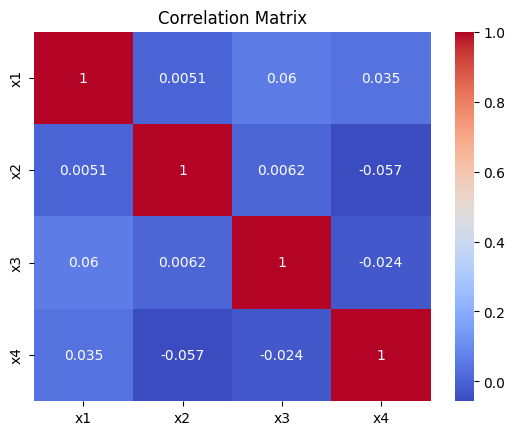

In [9]:
corr_mat = df.drop(['x5', 'y'], axis=1).corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### c. Train this dataset using Logistic regression, Decision Tree and Random Forest. Compare the performance of all the models based on accuracy and F1 score.


In [10]:
X = df.drop('y', axis=1)
y = df['y']

In [12]:
X = pd.get_dummies(X, columns=['x5'], drop_first=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = {'Accuracy': accuracy, 'F1 Score': f1}

for model_name, metrics in results.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']:.4f}, F1 Score: {metrics['F1 Score']:.4f}")

Logistic Regression - Accuracy: 0.5000, F1 Score: 0.4828
Decision Tree - Accuracy: 0.3667, F1 Score: 0.3871
Random Forest - Accuracy: 0.5333, F1 Score: 0.5000


### d.	Draw confusion matrix of each model.


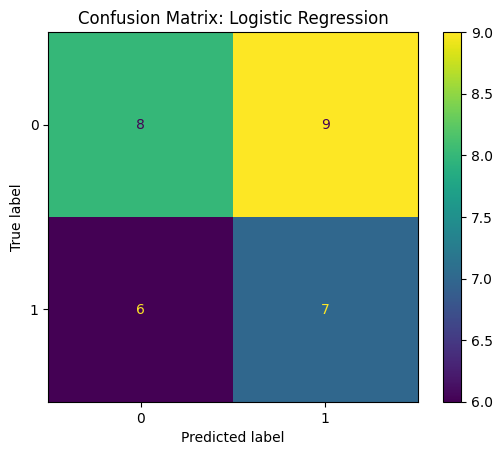

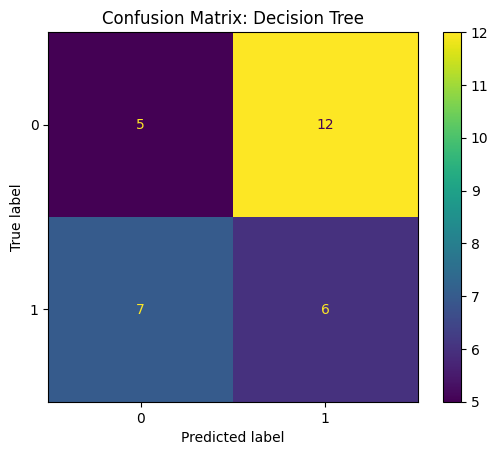

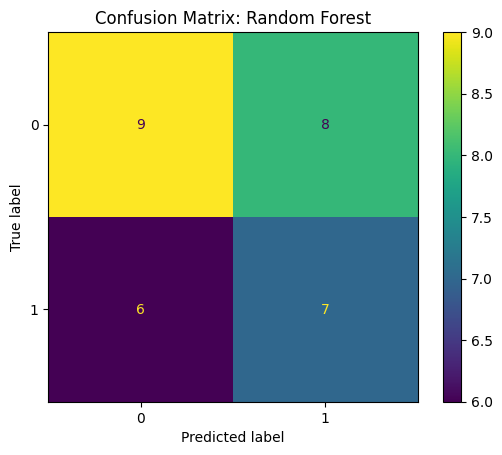

In [18]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

### e.	Check whether scaling improves the performance or not.


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

for model_name, model in models.items():
    # Train model with scaled data
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred_scaled = model.predict(X_test_scaled)
    # Evaluate
    accuracy_scaled = accuracy_score(y_test_scaled, y_pred_scaled)
    f1_scaled = f1_score(y_test_scaled, y_pred_scaled)
    print(f"Scaled {model_name} - Accuracy: {accuracy_scaled:.4f}, F1 Score: {f1_scaled:.4f}")

Scaled Logistic Regression - Accuracy: 0.5000, F1 Score: 0.4828
Scaled Decision Tree - Accuracy: 0.3667, F1 Score: 0.3871
Scaled Random Forest - Accuracy: 0.5667, F1 Score: 0.5517


### 6.	Consider two features x and y based on the following function: y = 3x + k, where k can be prepared based on 1000 random values. Now generate 1000 random values between 0 and 1 for x. Calculate y based on above function for these 1000 values of x. Now train Linear Regression model and check the score for the same.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [21]:
x = np.random.rand(1000)
k = np.random.rand(1000)
y = 3 * x + k

In [23]:
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,0.303272,1.325112
1,0.132561,0.842052
2,0.065906,1.142732
3,0.591742,2.210933
4,0.678349,2.389768


In [24]:
X = df[['x']]
Y = df['y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [26]:
Y_pred = model.predict(X_test)
score = r2_score(Y_test, Y_pred)

print(f"R^2 score for the Linear Regression model: {score:.4f}")

R^2 score for the Linear Regression model: 0.9030


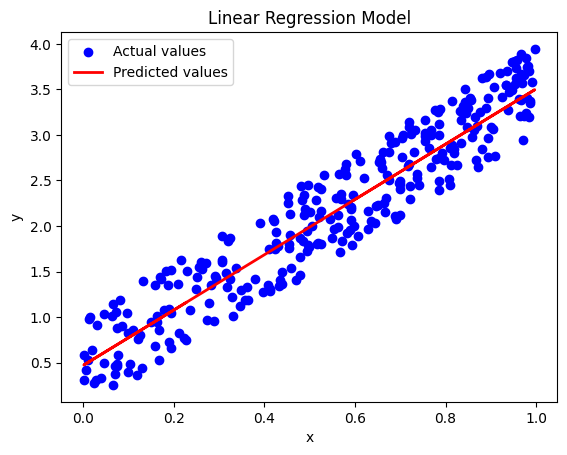

In [27]:
plt.scatter(X_test, Y_test, color='blue', label='Actual values')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Predicted values')
plt.title('Linear Regression Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()